In [185]:
import pynetlogo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import scipy
from itertools import product
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

https://pynetlogo.readthedocs.io/en/latest/_docs/pynetlogo.html
https://medium.com/geekculture/pynetlogo-tutorial-ea3146188561
https://pure.tudelft.nl/ws/portalfiles/portal/44031616/4.pdf
https://pynetlogo.readthedocs.io/en/latest/

In [4]:
# seems like I need netlogo_home input for my computer
nlogo = pynetlogo.NetLogoLink(netlogo_home="/Users/yugonagatake/Documents/zemi/2nd_sem/NetLogo6.4.0", jvm_path="/Users/yugonagatake/Documents/zemi/2nd_sem/NetLogo6.4.0/runtime/Contents/MacOS/libjli.dylib")


In [92]:
# seems like python extention
nlogo.load_model("./NetLogo6.4.0/ch7-8.nlogo")

In [96]:
nlogo.command("setup")

In [ ]:
# didn't use tho
nlogo.report("ticks")

In [177]:
configs = {
    "prob-strategy": [i/100 for i in range(1, 100, 20)],
    "endowment-mean": [50],
    "endowment-alpha": [0.01, 0.1, 1, 5, 10],
    "influence-power-mean": [i/100 for i in range(1, 100, 20)],
    "influence-link-max": [2, 4, 6, 8],
    "num-turtles": [40, 60, 80, 100],
    "imitator-ratio": [i/100 for i in range(1, 100, 20)],
    "return-level": [1],
    "how-far-apart": [1, 5, 10, 15, 20],
    "contingent-effect-depreciation": [i/100 for i in range(0, 100, 20)],
    "network": [True],
    "contingent": [True]
}

config_ranges = {
    "prob-strategy": (float, 0.01, 1),
    "endowment-mean": (float, 50, 50.01),
    "endowment-alpha": (float, 0.01, 10),
    "influence-power-mean": (float, 0.01, 1),
    "influence-link-max": (int, 2, 10),
    "num-turtles": (int, 10,200),
    "imitator-ratio": (float, 0, 1),
    "return-level": (float, 1, 1.01),
    "how-far-apart": (float, 1, 20),
    "contingent-effect-depreciation": (float, 0, 1),
    "network": (bool, True),
    "contingent": (bool, True)
}

In [127]:
def set_config(nlogo, configs, config_comb):
    for i, param in enumerate(configs.keys(), 0):
        nlogo.command(f"set {param} {config_comb[i]}")

In [172]:
def set_rand_config(nlogo, config_ranges):
    for param in config_ranges.keys():
        if config_ranges[param][0] == float:
            nlogo.command(f"set {param} {np.random.uniform(low=config_ranges[param][1], high=config_ranges[param][2])}")
        elif config_ranges[param][0] == int:
            nlogo.command(f"set {param} {round(np.random.uniform(low=config_ranges[param][1], high=config_ranges[param][2]))}")
        elif config_ranges[param][0] == bool:
            nlogo.command(f"set {param} {config_ranges[param][1]}")
            
            

In [169]:
def controlled_run(nlogo, configs, comb, run_per_config):
    for i in range(run_per_config):
        set_config(nlogo, configs, comb)
        nlogo.command("setup")
        nlogo.repeat_command("go", 100)
        nlogo.command("set return-level 0")
        nlogo.repeat_command("go", 100)
        nlogo.command("set return-level 1")
        nlogo.repeat_command("go", 100)
        nlogo.command("record-data")

In [170]:
def simulate(nlogo, configs, run_per_config, sampling_prob):
    config_combinations = product(configs["prob-strategy"], configs["endowment-mean"], configs["endowment-alpha"], configs["influence-power-mean"], configs["influence-link-max"], configs["num-turtles"], configs["imitator-ratio"], configs["return-level"], configs["how-far-apart"], configs["contingent-effect-depreciation"], configs["network"], configs["contingent"])
    counter = 0
    print(f"simulation sampling starting at {datetime.now()}")
    for comb in config_combinations:
        if np.random.default_rng().random() < sampling_prob:
            controlled_run(nlogo, configs, comb, run_per_config)
        counter += 1
        if counter % 100 == 0:
            print(f"{counter} configurations considered at {datetime.now()}")

In [193]:
def simulate_randomized(nlogo, config_ranges, sampling_num, run_per_config=1): # config is just for keys...name of params
    counter = 0
    for j in range(sampling_num):
        set_rand_config(nlogo, config_ranges)
        for i in range(run_per_config):
            nlogo.command("setup")
            nlogo.repeat_command("go", 50)
            nlogo.command("set return-level 0")
            nlogo.repeat_command("go", 50)
            nlogo.command("set return-level 1")
            nlogo.repeat_command("go", 50)
            nlogo.command("record-data")
            counter += 1
        if counter % 100 == 0:
            print(f"{counter} configuration sampled at {datetime.now()}")
            

In [162]:
simulate(nlogo, configs, run_per_config=1, sampling_prob=0.01)

simulation sampling starting at 2024-04-27 19:23:18.626295
100 configurations considered at 2024-04-27 19:23:18.637006
200 configurations considered at 2024-04-27 19:23:19.703309
300 configurations considered at 2024-04-27 19:23:19.707402
400 configurations considered at 2024-04-27 19:23:21.912851
500 configurations considered at 2024-04-27 19:23:21.916213
600 configurations considered at 2024-04-27 19:23:21.918522
700 configurations considered at 2024-04-27 19:23:23.699835
800 configurations considered at 2024-04-27 19:23:26.581913
900 configurations considered at 2024-04-27 19:23:27.755456
1000 configurations considered at 2024-04-27 19:23:29.772328
1100 configurations considered at 2024-04-27 19:23:32.846199
1200 configurations considered at 2024-04-27 19:23:35.629710
1300 configurations considered at 2024-04-27 19:23:37.186504
1400 configurations considered at 2024-04-27 19:23:39.029038
1500 configurations considered at 2024-04-27 19:23:39.035551
1600 configurations considered at 2

13500 configurations considered at 2024-04-27 19:26:32.893734
13600 configurations considered at 2024-04-27 19:26:38.965747
13700 configurations considered at 2024-04-27 19:26:41.796588
13800 configurations considered at 2024-04-27 19:26:44.634966
13900 configurations considered at 2024-04-27 19:26:44.638071
14000 configurations considered at 2024-04-27 19:26:44.640483
14100 configurations considered at 2024-04-27 19:26:46.125429
14200 configurations considered at 2024-04-27 19:26:46.130553
14300 configurations considered at 2024-04-27 19:26:48.637444
14400 configurations considered at 2024-04-27 19:26:51.347072
14500 configurations considered at 2024-04-27 19:26:51.350391
14600 configurations considered at 2024-04-27 19:26:51.353019
14700 configurations considered at 2024-04-27 19:26:53.348502
14800 configurations considered at 2024-04-27 19:26:53.352194
14900 configurations considered at 2024-04-27 19:26:53.354851
15000 configurations considered at 2024-04-27 19:26:59.462799
15100 co

26900 configurations considered at 2024-04-27 19:30:08.458472
27000 configurations considered at 2024-04-27 19:30:08.464475
27100 configurations considered at 2024-04-27 19:30:08.467087
27200 configurations considered at 2024-04-27 19:30:10.793896
27300 configurations considered at 2024-04-27 19:30:12.158463
27400 configurations considered at 2024-04-27 19:30:17.287813
27500 configurations considered at 2024-04-27 19:30:25.688558
27600 configurations considered at 2024-04-27 19:30:26.650774
27700 configurations considered at 2024-04-27 19:30:26.655787
27800 configurations considered at 2024-04-27 19:30:28.417627
27900 configurations considered at 2024-04-27 19:30:31.614263
28000 configurations considered at 2024-04-27 19:30:31.795529
28100 configurations considered at 2024-04-27 19:30:31.798464
28200 configurations considered at 2024-04-27 19:30:34.427409
28300 configurations considered at 2024-04-27 19:30:34.432517
28400 configurations considered at 2024-04-27 19:30:34.435405
28500 co

40200 configurations considered at 2024-04-27 19:33:40.701524
40300 configurations considered at 2024-04-27 19:33:40.704564
40400 configurations considered at 2024-04-27 19:33:42.845018
40500 configurations considered at 2024-04-27 19:33:42.851752
40600 configurations considered at 2024-04-27 19:33:44.382601
40700 configurations considered at 2024-04-27 19:33:46.122590
40800 configurations considered at 2024-04-27 19:33:48.267039
40900 configurations considered at 2024-04-27 19:33:48.271146
41000 configurations considered at 2024-04-27 19:33:51.531940
41100 configurations considered at 2024-04-27 19:33:52.768586
41200 configurations considered at 2024-04-27 19:33:54.811936
41300 configurations considered at 2024-04-27 19:33:55.762819
41400 configurations considered at 2024-04-27 19:33:55.769083
41500 configurations considered at 2024-04-27 19:33:55.771404
41600 configurations considered at 2024-04-27 19:33:59.002731
41700 configurations considered at 2024-04-27 19:34:00.404581
41800 co

53800 configurations considered at 2024-04-27 19:37:05.684887
53900 configurations considered at 2024-04-27 19:37:06.866413
54000 configurations considered at 2024-04-27 19:37:06.873265
54100 configurations considered at 2024-04-27 19:37:07.693007
54200 configurations considered at 2024-04-27 19:37:08.142090
54300 configurations considered at 2024-04-27 19:37:09.912006
54400 configurations considered at 2024-04-27 19:37:10.037485
54500 configurations considered at 2024-04-27 19:37:10.041231
54600 configurations considered at 2024-04-27 19:37:10.043868
54700 configurations considered at 2024-04-27 19:37:12.209802
54800 configurations considered at 2024-04-27 19:37:14.671240
54900 configurations considered at 2024-04-27 19:37:14.676592
55000 configurations considered at 2024-04-27 19:37:14.679127
55100 configurations considered at 2024-04-27 19:37:16.766581
55200 configurations considered at 2024-04-27 19:37:17.695457
55300 configurations considered at 2024-04-27 19:37:17.699309
55400 co

67100 configurations considered at 2024-04-27 19:40:06.299437
67200 configurations considered at 2024-04-27 19:40:06.302694
67300 configurations considered at 2024-04-27 19:40:06.305165
67400 configurations considered at 2024-04-27 19:40:08.591591
67500 configurations considered at 2024-04-27 19:40:11.979547
67600 configurations considered at 2024-04-27 19:40:14.103452
67700 configurations considered at 2024-04-27 19:40:14.108436
67800 configurations considered at 2024-04-27 19:40:14.111262
67900 configurations considered at 2024-04-27 19:40:19.027793
68000 configurations considered at 2024-04-27 19:40:19.032375
68100 configurations considered at 2024-04-27 19:40:20.488587
68200 configurations considered at 2024-04-27 19:40:20.493427
68300 configurations considered at 2024-04-27 19:40:24.273551
68400 configurations considered at 2024-04-27 19:40:26.475579
68500 configurations considered at 2024-04-27 19:40:29.753751
68600 configurations considered at 2024-04-27 19:40:31.455957
68700 co

80400 configurations considered at 2024-04-27 19:43:26.307993
80500 configurations considered at 2024-04-27 19:43:26.314867
80600 configurations considered at 2024-04-27 19:43:27.158995
80700 configurations considered at 2024-04-27 19:43:29.579127
80800 configurations considered at 2024-04-27 19:43:30.792667
80900 configurations considered at 2024-04-27 19:43:30.795602
81000 configurations considered at 2024-04-27 19:43:34.177091
81100 configurations considered at 2024-04-27 19:43:37.115680
81200 configurations considered at 2024-04-27 19:43:38.833081
81300 configurations considered at 2024-04-27 19:43:43.109217
81400 configurations considered at 2024-04-27 19:43:46.624177
81500 configurations considered at 2024-04-27 19:43:46.628547
81600 configurations considered at 2024-04-27 19:43:46.631399
81700 configurations considered at 2024-04-27 19:43:48.075612
81800 configurations considered at 2024-04-27 19:43:50.539456
81900 configurations considered at 2024-04-27 19:43:50.543217
82000 co

93800 configurations considered at 2024-04-27 19:47:32.038528
93900 configurations considered at 2024-04-27 19:47:32.041674
94000 configurations considered at 2024-04-27 19:47:35.666414
94100 configurations considered at 2024-04-27 19:47:35.671465
94200 configurations considered at 2024-04-27 19:47:35.674179
94300 configurations considered at 2024-04-27 19:47:38.628165
94400 configurations considered at 2024-04-27 19:47:38.632261
94500 configurations considered at 2024-04-27 19:47:39.446008
94600 configurations considered at 2024-04-27 19:47:39.450233
94700 configurations considered at 2024-04-27 19:47:41.013532
94800 configurations considered at 2024-04-27 19:47:41.019147
94900 configurations considered at 2024-04-27 19:47:41.021998
95000 configurations considered at 2024-04-27 19:47:45.255124
95100 configurations considered at 2024-04-27 19:47:45.988173
95200 configurations considered at 2024-04-27 19:47:47.704590
95300 configurations considered at 2024-04-27 19:47:47.714128
95400 co

107100 configurations considered at 2024-04-27 19:50:43.075097
107200 configurations considered at 2024-04-27 19:50:49.410133
107300 configurations considered at 2024-04-27 19:50:50.249662
107400 configurations considered at 2024-04-27 19:50:53.261291
107500 configurations considered at 2024-04-27 19:50:53.267086
107600 configurations considered at 2024-04-27 19:50:53.269442
107700 configurations considered at 2024-04-27 19:50:53.272007
107800 configurations considered at 2024-04-27 19:50:53.275743
107900 configurations considered at 2024-04-27 19:50:57.342810
108000 configurations considered at 2024-04-27 19:51:02.354606
108100 configurations considered at 2024-04-27 19:51:02.366544
108200 configurations considered at 2024-04-27 19:51:03.335148
108300 configurations considered at 2024-04-27 19:51:04.329071
108400 configurations considered at 2024-04-27 19:51:09.427476
108500 configurations considered at 2024-04-27 19:51:09.436706
108600 configurations considered at 2024-04-27 19:51:09

120200 configurations considered at 2024-04-27 19:53:45.290202
120300 configurations considered at 2024-04-27 19:53:47.612632
120400 configurations considered at 2024-04-27 19:53:49.988330
120500 configurations considered at 2024-04-27 19:53:51.098392
120600 configurations considered at 2024-04-27 19:53:51.103814
120700 configurations considered at 2024-04-27 19:53:51.106275
120800 configurations considered at 2024-04-27 19:53:51.707856
120900 configurations considered at 2024-04-27 19:53:51.711031
121000 configurations considered at 2024-04-27 19:53:51.713524
121100 configurations considered at 2024-04-27 19:53:52.971539
121200 configurations considered at 2024-04-27 19:53:53.948679
121300 configurations considered at 2024-04-27 19:53:55.952112
121400 configurations considered at 2024-04-27 19:53:55.956006
121500 configurations considered at 2024-04-27 19:53:55.959751
121600 configurations considered at 2024-04-27 19:53:55.962747
121700 configurations considered at 2024-04-27 19:53:57

133400 configurations considered at 2024-04-27 19:56:28.454916
133500 configurations considered at 2024-04-27 19:56:30.118992
133600 configurations considered at 2024-04-27 19:56:30.125930
133700 configurations considered at 2024-04-27 19:56:31.566371
133800 configurations considered at 2024-04-27 19:56:34.521765
133900 configurations considered at 2024-04-27 19:56:36.265474
134000 configurations considered at 2024-04-27 19:56:40.172711
134100 configurations considered at 2024-04-27 19:56:41.916726
134200 configurations considered at 2024-04-27 19:56:41.920740
134300 configurations considered at 2024-04-27 19:56:43.553616
134400 configurations considered at 2024-04-27 19:56:43.558357
134500 configurations considered at 2024-04-27 19:56:46.221728
134600 configurations considered at 2024-04-27 19:56:46.227395
134700 configurations considered at 2024-04-27 19:56:47.930756
134800 configurations considered at 2024-04-27 19:56:47.934104
134900 configurations considered at 2024-04-27 19:56:50

146600 configurations considered at 2024-04-27 20:00:09.711904
146700 configurations considered at 2024-04-27 20:00:09.716975
146800 configurations considered at 2024-04-27 20:00:10.165254
146900 configurations considered at 2024-04-27 20:00:13.234240
147000 configurations considered at 2024-04-27 20:00:13.241501
147100 configurations considered at 2024-04-27 20:00:13.932912
147200 configurations considered at 2024-04-27 20:00:13.938554
147300 configurations considered at 2024-04-27 20:00:17.676551
147400 configurations considered at 2024-04-27 20:00:20.992326
147500 configurations considered at 2024-04-27 20:00:23.158852
147600 configurations considered at 2024-04-27 20:00:24.928242
147700 configurations considered at 2024-04-27 20:00:26.559344
147800 configurations considered at 2024-04-27 20:00:27.927022
147900 configurations considered at 2024-04-27 20:00:29.899385
148000 configurations considered at 2024-04-27 20:00:30.037637
148100 configurations considered at 2024-04-27 20:00:33

159700 configurations considered at 2024-04-27 20:03:57.694816
159800 configurations considered at 2024-04-27 20:03:57.700862
159900 configurations considered at 2024-04-27 20:03:57.705253
160000 configurations considered at 2024-04-27 20:03:59.062438
160100 configurations considered at 2024-04-27 20:04:01.021267
160200 configurations considered at 2024-04-27 20:04:02.823892
160300 configurations considered at 2024-04-27 20:04:02.831497
160400 configurations considered at 2024-04-27 20:04:07.991659
160500 configurations considered at 2024-04-27 20:04:11.330488
160600 configurations considered at 2024-04-27 20:04:11.337809
160700 configurations considered at 2024-04-27 20:04:13.227469
160800 configurations considered at 2024-04-27 20:04:20.723405
160900 configurations considered at 2024-04-27 20:04:23.578273
161000 configurations considered at 2024-04-27 20:04:26.793980
161100 configurations considered at 2024-04-27 20:04:27.841928
161200 configurations considered at 2024-04-27 20:04:28

172800 configurations considered at 2024-04-27 20:07:20.049528
172900 configurations considered at 2024-04-27 20:07:20.052630
173000 configurations considered at 2024-04-27 20:07:24.415360
173100 configurations considered at 2024-04-27 20:07:25.599425
173200 configurations considered at 2024-04-27 20:07:26.969053
173300 configurations considered at 2024-04-27 20:07:29.638284
173400 configurations considered at 2024-04-27 20:07:29.641746
173500 configurations considered at 2024-04-27 20:07:29.644270
173600 configurations considered at 2024-04-27 20:07:31.875006
173700 configurations considered at 2024-04-27 20:07:31.879292
173800 configurations considered at 2024-04-27 20:07:32.663134
173900 configurations considered at 2024-04-27 20:07:34.516525
174000 configurations considered at 2024-04-27 20:07:36.890808
174100 configurations considered at 2024-04-27 20:07:37.357909
174200 configurations considered at 2024-04-27 20:07:37.360885
174300 configurations considered at 2024-04-27 20:07:38

186000 configurations considered at 2024-04-27 20:11:01.761402
186100 configurations considered at 2024-04-27 20:11:02.325451
186200 configurations considered at 2024-04-27 20:11:03.181517
186300 configurations considered at 2024-04-27 20:11:06.051889
186400 configurations considered at 2024-04-27 20:11:06.057383
186500 configurations considered at 2024-04-27 20:11:06.060106
186600 configurations considered at 2024-04-27 20:11:07.529064
186700 configurations considered at 2024-04-27 20:11:12.505784
186800 configurations considered at 2024-04-27 20:11:16.017064
186900 configurations considered at 2024-04-27 20:11:16.019958
187000 configurations considered at 2024-04-27 20:11:16.022351
187100 configurations considered at 2024-04-27 20:11:17.803735
187200 configurations considered at 2024-04-27 20:11:17.808896
187300 configurations considered at 2024-04-27 20:11:17.811535
187400 configurations considered at 2024-04-27 20:11:17.814613
187500 configurations considered at 2024-04-27 20:11:17

199100 configurations considered at 2024-04-27 20:14:14.580132
199200 configurations considered at 2024-04-27 20:14:14.586240
199300 configurations considered at 2024-04-27 20:14:14.588761
199400 configurations considered at 2024-04-27 20:14:14.591245
199500 configurations considered at 2024-04-27 20:14:14.593608
199600 configurations considered at 2024-04-27 20:14:14.596088
199700 configurations considered at 2024-04-27 20:14:14.598501
199800 configurations considered at 2024-04-27 20:14:16.302854
199900 configurations considered at 2024-04-27 20:14:17.483581
200000 configurations considered at 2024-04-27 20:14:19.452369
200100 configurations considered at 2024-04-27 20:14:19.456111
200200 configurations considered at 2024-04-27 20:14:19.458596
200300 configurations considered at 2024-04-27 20:14:19.635613
200400 configurations considered at 2024-04-27 20:14:20.773005
200500 configurations considered at 2024-04-27 20:14:21.702660
200600 configurations considered at 2024-04-27 20:14:21

212200 configurations considered at 2024-04-27 20:16:24.125733
212300 configurations considered at 2024-04-27 20:16:24.129487
212400 configurations considered at 2024-04-27 20:16:24.131998
212500 configurations considered at 2024-04-27 20:16:27.463138
212600 configurations considered at 2024-04-27 20:16:30.843678
212700 configurations considered at 2024-04-27 20:16:30.971853
212800 configurations considered at 2024-04-27 20:16:33.082090
212900 configurations considered at 2024-04-27 20:16:33.087458
213000 configurations considered at 2024-04-27 20:16:33.090323
213100 configurations considered at 2024-04-27 20:16:33.443457
213200 configurations considered at 2024-04-27 20:16:35.840926
213300 configurations considered at 2024-04-27 20:16:35.843859
213400 configurations considered at 2024-04-27 20:16:37.884516
213500 configurations considered at 2024-04-27 20:16:39.509457
213600 configurations considered at 2024-04-27 20:16:39.515006
213700 configurations considered at 2024-04-27 20:16:40

225300 configurations considered at 2024-04-27 20:19:38.990391
225400 configurations considered at 2024-04-27 20:19:38.993937
225500 configurations considered at 2024-04-27 20:19:38.997531
225600 configurations considered at 2024-04-27 20:19:46.161374
225700 configurations considered at 2024-04-27 20:19:46.164759
225800 configurations considered at 2024-04-27 20:19:46.167218
225900 configurations considered at 2024-04-27 20:19:48.009623
226000 configurations considered at 2024-04-27 20:19:49.613085
226100 configurations considered at 2024-04-27 20:19:51.024099
226200 configurations considered at 2024-04-27 20:19:51.030406
226300 configurations considered at 2024-04-27 20:19:51.579582
226400 configurations considered at 2024-04-27 20:19:51.584019
226500 configurations considered at 2024-04-27 20:19:52.293226
226600 configurations considered at 2024-04-27 20:19:54.360364
226700 configurations considered at 2024-04-27 20:19:59.536796
226800 configurations considered at 2024-04-27 20:20:01

238400 configurations considered at 2024-04-27 20:22:31.624323
238500 configurations considered at 2024-04-27 20:22:33.458114
238600 configurations considered at 2024-04-27 20:22:34.210299
238700 configurations considered at 2024-04-27 20:22:35.784432
238800 configurations considered at 2024-04-27 20:22:39.286458
238900 configurations considered at 2024-04-27 20:22:40.960063
239000 configurations considered at 2024-04-27 20:22:43.158672
239100 configurations considered at 2024-04-27 20:22:44.779004
239200 configurations considered at 2024-04-27 20:22:44.783001
239300 configurations considered at 2024-04-27 20:22:44.785664
239400 configurations considered at 2024-04-27 20:22:44.788773
239500 configurations considered at 2024-04-27 20:22:44.791729
239600 configurations considered at 2024-04-27 20:22:46.077067
239700 configurations considered at 2024-04-27 20:22:48.871567
239800 configurations considered at 2024-04-27 20:22:51.023465
239900 configurations considered at 2024-04-27 20:22:51

In [204]:
simulate_randomized(nlogo, config_ranges, sampling_num=10000)

100 configuration sampled at 2024-04-28 00:26:53.806142
200 configuration sampled at 2024-04-28 00:31:50.452675
300 configuration sampled at 2024-04-28 00:36:32.181558
400 configuration sampled at 2024-04-28 00:41:33.153846
500 configuration sampled at 2024-04-28 00:46:10.120766
600 configuration sampled at 2024-04-28 00:50:34.194355
700 configuration sampled at 2024-04-28 00:54:54.917439
800 configuration sampled at 2024-04-28 01:00:10.612422
900 configuration sampled at 2024-04-28 01:05:05.743131
1000 configuration sampled at 2024-04-28 01:09:36.498163
1100 configuration sampled at 2024-04-28 01:13:18.975125
1200 configuration sampled at 2024-04-28 01:17:24.579067
1300 configuration sampled at 2024-04-28 01:21:42.494491
1400 configuration sampled at 2024-04-28 01:25:45.686229
1500 configuration sampled at 2024-04-28 01:29:50.691720
1600 configuration sampled at 2024-04-28 01:33:34.834323
1700 configuration sampled at 2024-04-28 01:37:05.593806
1800 configuration sampled at 2024-04-28

KeyboardInterrupt: 

In [205]:
data = pd.read_csv("NetLogo6.4.0/ch78model_results.csv")

In [206]:
data.shape

(3262, 12)

In [207]:
data.to_csv(f"ch78model_results_stored{datetime.now()}.csv")

<Axes: >

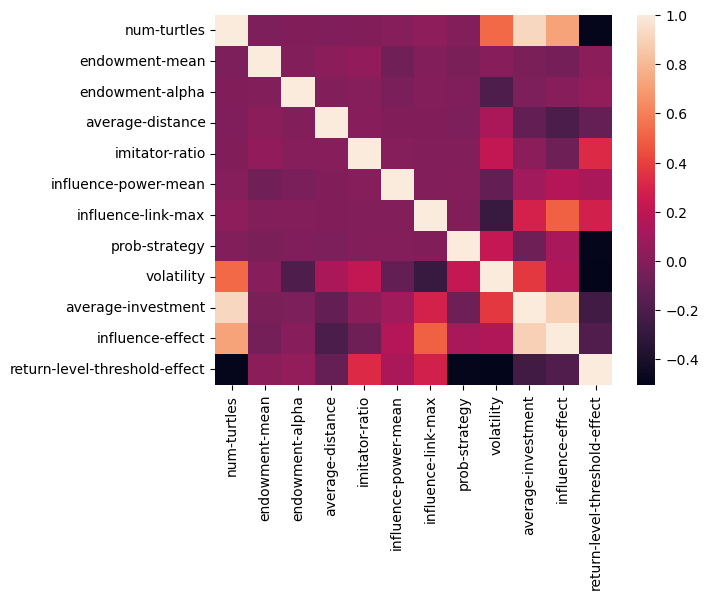

In [208]:
sns.heatmap(data.corr())

<Axes: xlabel='return-level-threshold-effect', ylabel='influence-power-mean'>

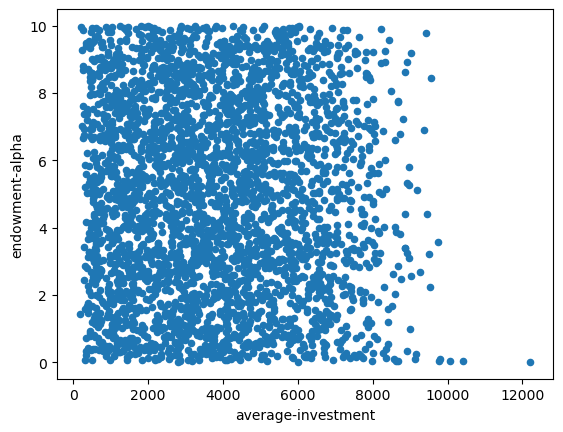

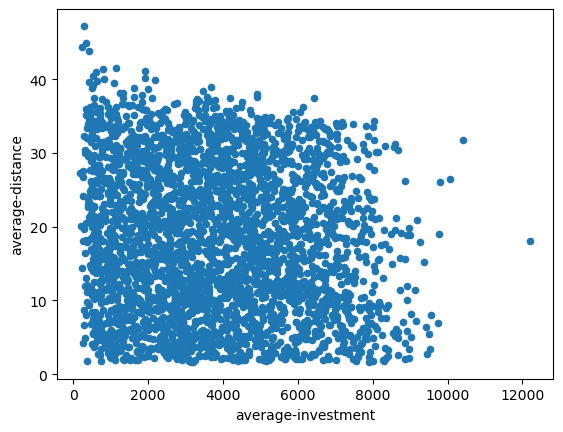

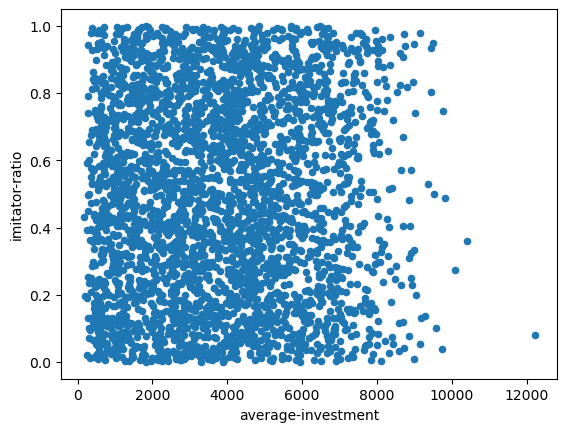

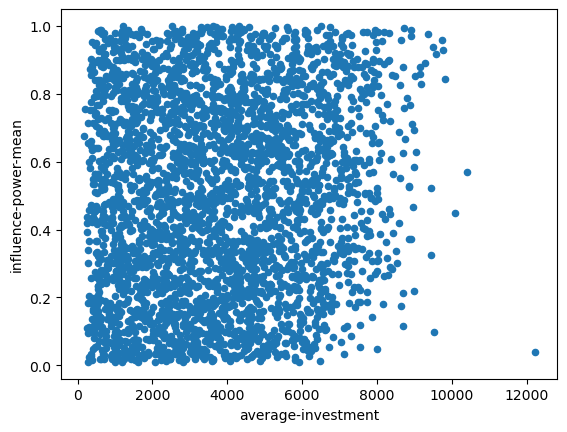

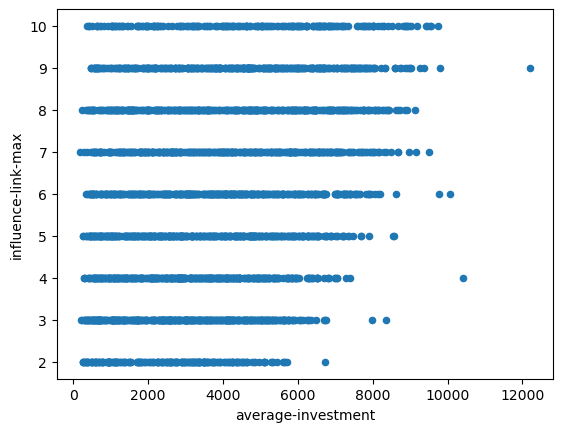

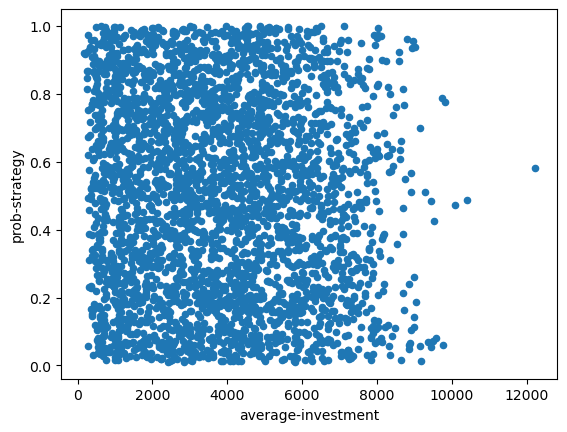

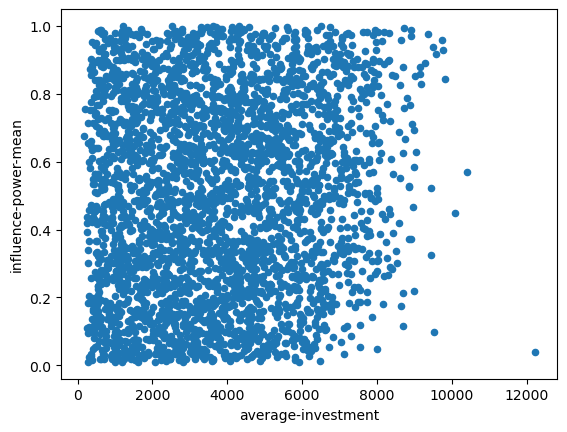

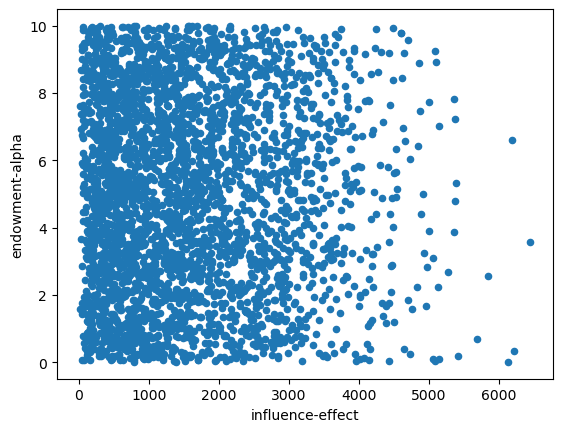

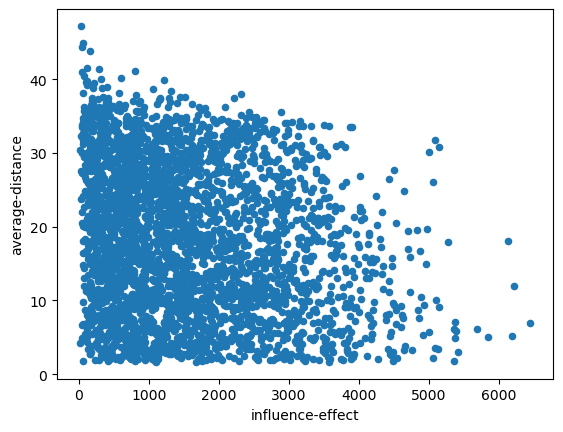

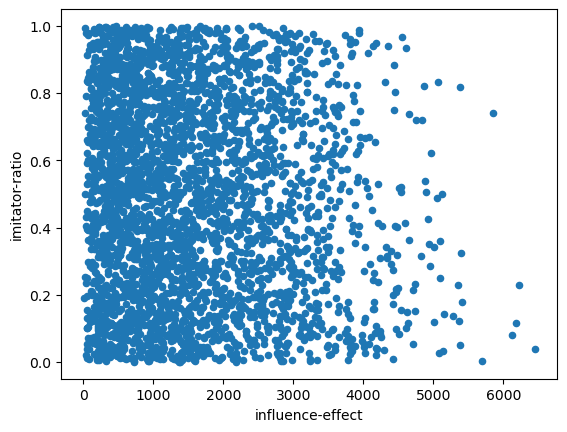

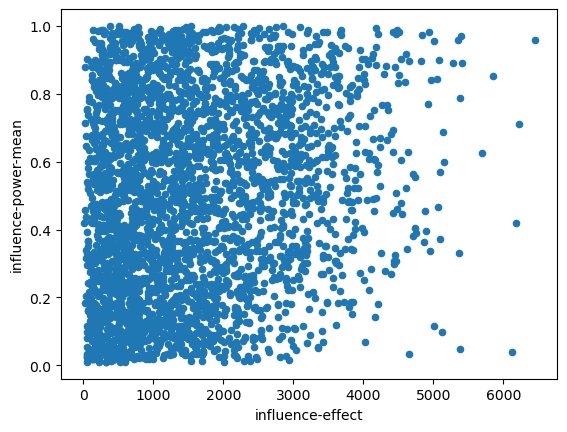

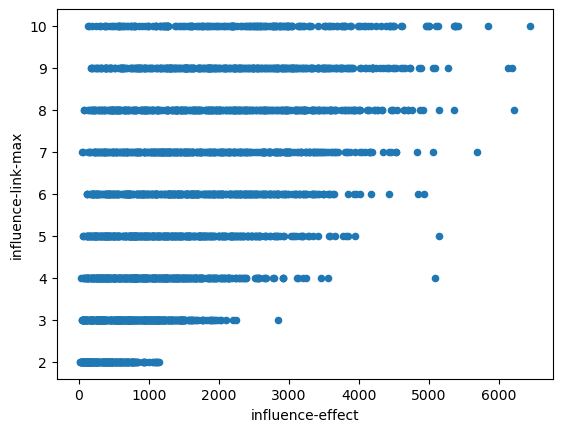

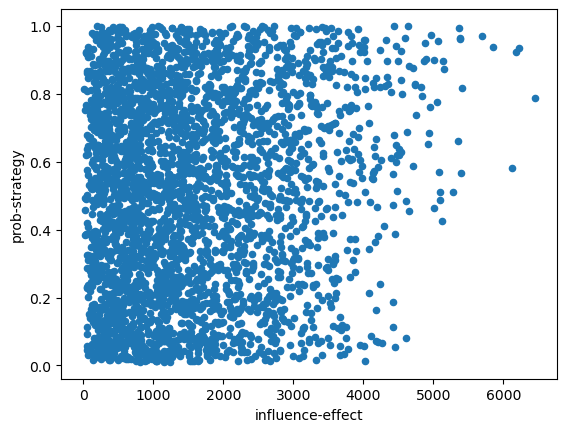

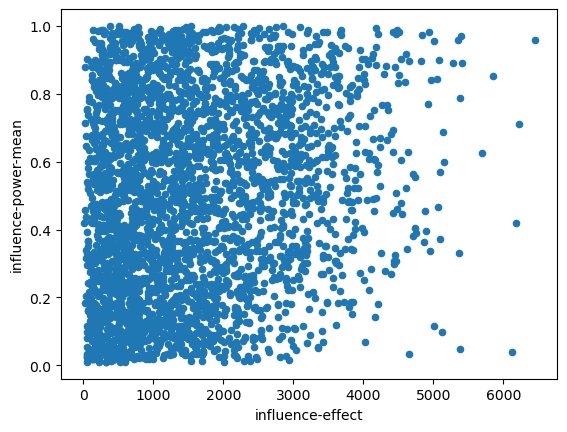

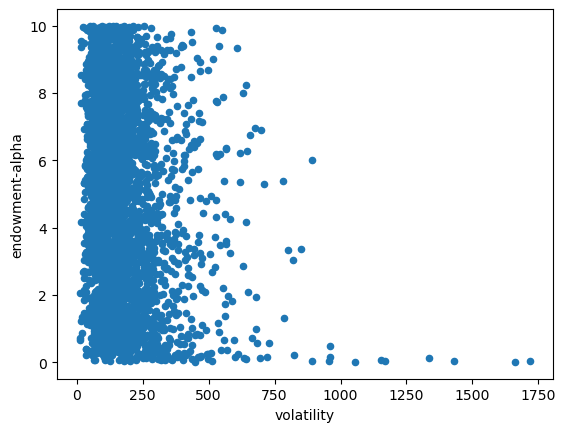

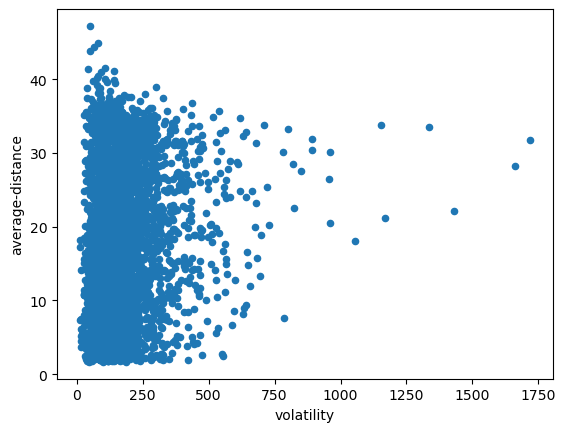

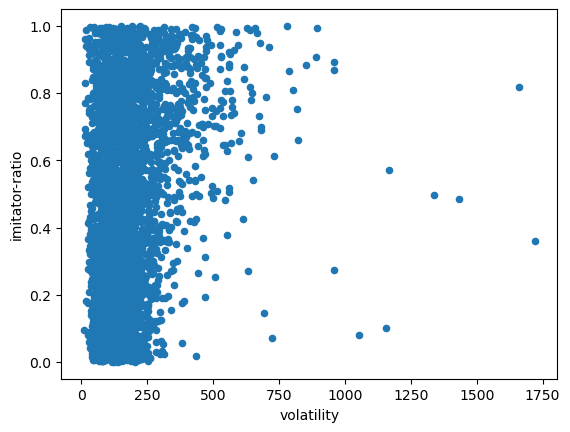

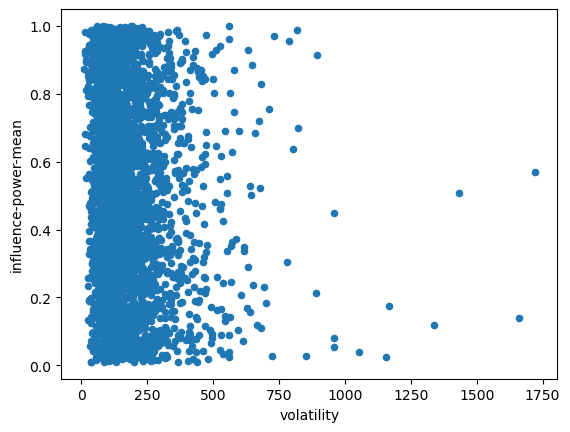

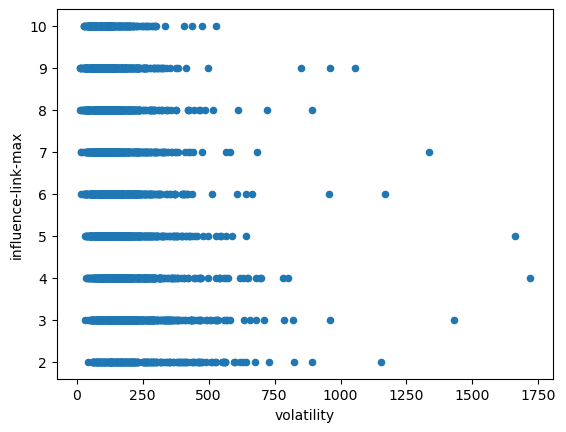

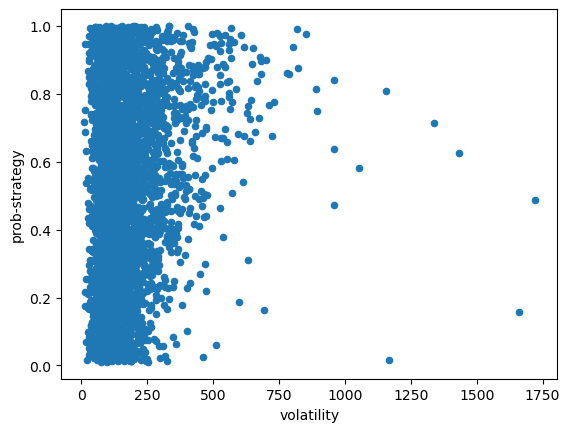

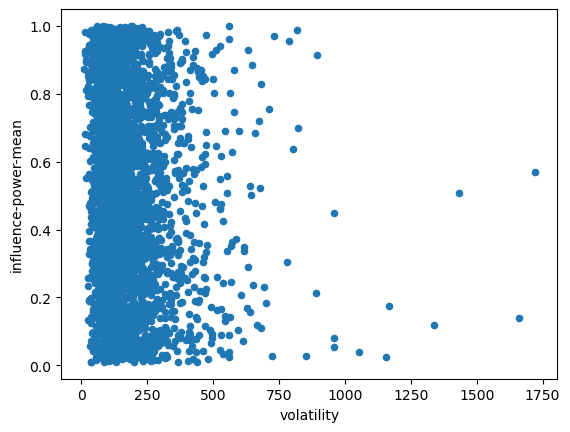

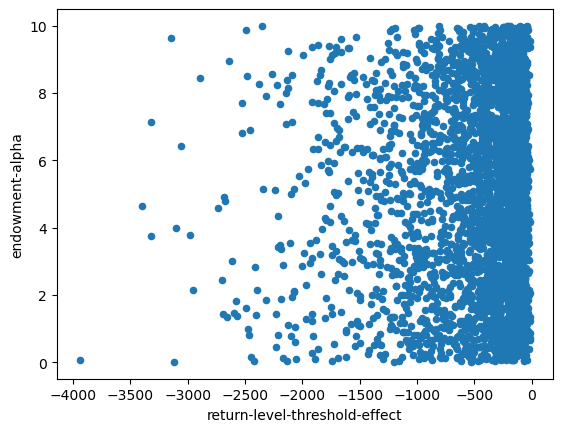

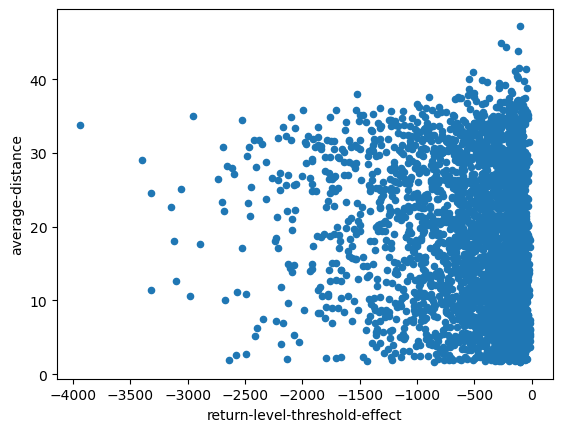

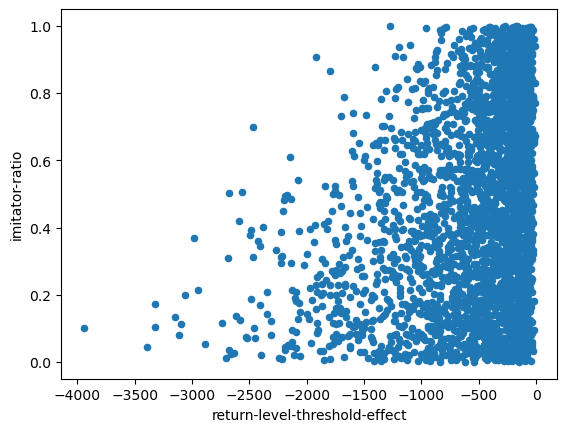

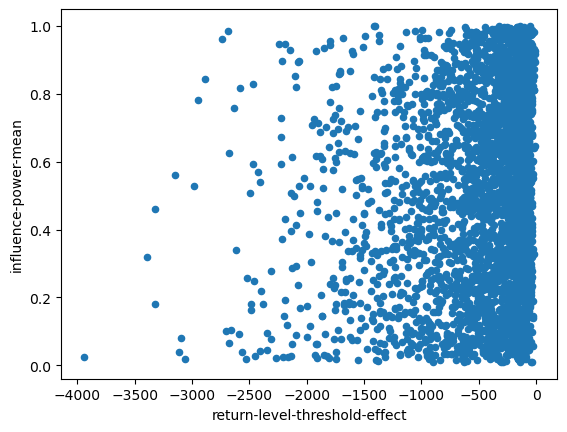

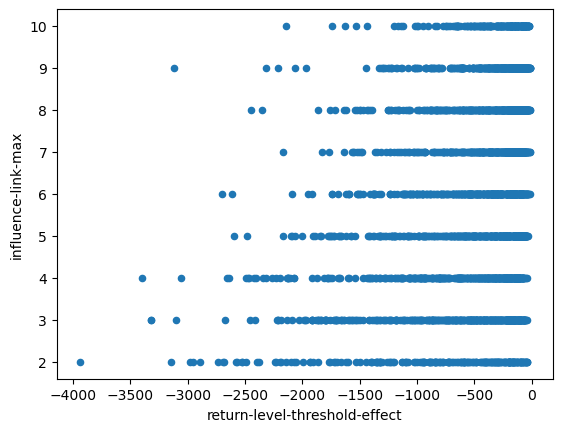

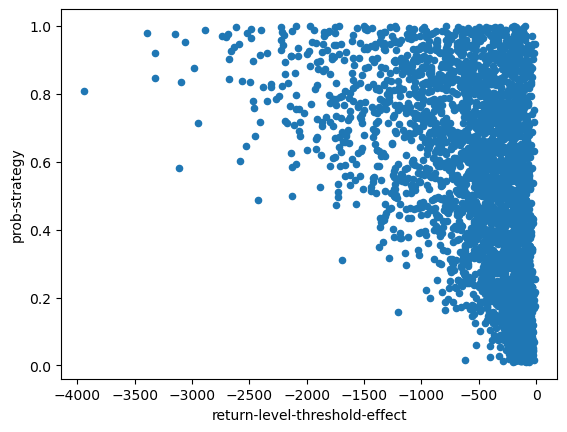

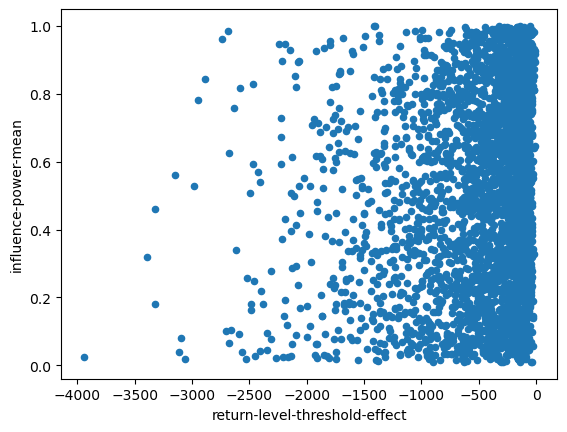

In [209]:
data.plot.scatter(x="average-investment", y="endowment-alpha")
data.plot.scatter(x="average-investment", y="average-distance")
data.plot.scatter(x="average-investment", y="imitator-ratio")
data.plot.scatter(x="average-investment", y="influence-power-mean")
data.plot.scatter(x="average-investment", y="influence-link-max")
data.plot.scatter(x="average-investment", y="prob-strategy")
data.plot.scatter(x="average-investment", y="influence-power-mean")
data.plot.scatter(x="influence-effect", y="endowment-alpha")
data.plot.scatter(x="influence-effect", y="average-distance")
data.plot.scatter(x="influence-effect", y="imitator-ratio")
data.plot.scatter(x="influence-effect", y="influence-power-mean")
data.plot.scatter(x="influence-effect", y="influence-link-max")
data.plot.scatter(x="influence-effect", y="prob-strategy")
data.plot.scatter(x="influence-effect", y="influence-power-mean")
data.plot.scatter(x="volatility", y="endowment-alpha")
data.plot.scatter(x="volatility", y="average-distance")
data.plot.scatter(x="volatility", y="imitator-ratio")
data.plot.scatter(x="volatility", y="influence-power-mean")
data.plot.scatter(x="volatility", y="influence-link-max")
data.plot.scatter(x="volatility", y="prob-strategy")
data.plot.scatter(x="volatility", y="influence-power-mean")
data.plot.scatter(x="return-level-threshold-effect", y="endowment-alpha")
data.plot.scatter(x="return-level-threshold-effect", y="average-distance")
data.plot.scatter(x="return-level-threshold-effect", y="imitator-ratio")
data.plot.scatter(x="return-level-threshold-effect", y="influence-power-mean")
data.plot.scatter(x="return-level-threshold-effect", y="influence-link-max")
data.plot.scatter(x="return-level-threshold-effect", y="prob-strategy")
data.plot.scatter(x="return-level-threshold-effect", y="influence-power-mean")


In [210]:
X = data.drop(columns=['average-investment', "influence-effect", 'volatility', "return-level-threshold-effect", "endowment-mean"])  # Explanatory variables
y = data['average-investment']  # Dependent variable
X_with_const = sm.add_constant(X)
model_linear = sm.OLS(y, X_with_const).fit()
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     average-investment   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     6600.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):               0.00
Time:                        02:06:04   Log-Likelihood:                -25205.
No. Observations:                3262   AIC:                         5.043e+04
Df Residuals:                    3254   BIC:                         5.047e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1096.7791     50.329    -21.792      0.000   -1195.459    -998.099
num-turtles             35.4373      0.176    201.326      0.000      35.092      35.782
endowment-alpha         -8.3731      3.391     -2.469      0.014     -15.021      -1.725
average-distance       -21.3145      0.973    -21.905      0.000     -23.222     -19.407
imitator-ratio         253.4372     33.121      7.652      0.000     188.497     318.377
influence-power-mean   704.2892     33.825     20.821      0.000     637.968     770.611
influence-link-max     228.8409      4.051     56.484      0.000     220.897     236.785
prob-strategy         -576.0341     33.499    -17.196      0.000    -641.715    -510.353
==============================================================================
Omnibus:                      778.458   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11258.404
Skew:                           0.728   Prob(JB):                         0.00
Kurtosis:                      11.984   Cond. No.                         696.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
X = data.drop(columns=['average-investment', "influence-effect", 'volatility', "return-level-threshold-effect", "endowment-mean"])  # Explanatory variables
y = data['influence-effect']  # Dependent variable
X_with_const = sm.add_constant(X)
model_linear = sm.OLS(y, X_with_const).fit()
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       influence-effect   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     2248.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):               0.00
Time:                        02:06:05   Log-Likelihood:                -24676.
No. Observations:                3262   AIC:                         4.937e+04
Df Residuals:                    3254   BIC:                         4.942e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1445.1169     42.800    -33.765      0.000   -1529.034   -1361.200
num-turtles             14.4219      0.150     96.347      0.000      14.128      14.715
endowment-alpha          9.5550      2.883      3.314      0.001       3.901      15.209
average-distance       -20.6285      0.827    -24.929      0.000     -22.251     -19.006
imitator-ratio        -274.5998     28.166     -9.749      0.000    -329.825    -219.375
influence-power-mean   668.9064     28.765     23.254      0.000     612.507     725.306
influence-link-max     224.7606      3.445     65.237      0.000     218.005     231.516
prob-strategy          501.5611     28.487     17.607      0.000     445.706     557.416
==============================================================================
Omnibus:                      303.514   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              845.174
Skew:                           0.508   Prob(JB):                    2.97e-184
Kurtosis:                       5.277   Cond. No.                         696.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [212]:
X = data.drop(columns=['average-investment', "influence-effect", 'volatility', "return-level-threshold-effect", "endowment-mean"])  # Explanatory variables
y = data['volatility']  # Dependent variable
X_with_const = sm.add_constant(X)
model_linear = sm.OLS(y, X_with_const).fit()
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             volatility   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     534.4
Date:                Sun, 28 Apr 2024   Prob (F-statistic):               0.00
Time:                        02:06:05   Log-Likelihood:                -19197.
No. Observations:                3262   AIC:                         3.841e+04
Df Residuals:                    3254   BIC:                         3.846e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   77.5639      7.979      9.721      0.000      61.920      93.208
num-turtles              1.2664      0.028     45.383      0.000       1.212       1.321
endowment-alpha         -8.5234      0.538    -15.856      0.000      -9.577      -7.469
average-distance         1.7384      0.154     11.269      0.000       1.436       2.041
imitator-ratio          98.8008      5.251     18.816      0.000      88.505     109.096
influence-power-mean   -58.2920      5.363    -10.870      0.000     -68.806     -47.778
influence-link-max     -15.6903      0.642    -24.429      0.000     -16.950     -14.431
prob-strategy           98.9902      5.311     18.640      0.000      88.577     109.403
==============================================================================
Omnibus:                     3459.106   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           430304.608
Skew:                           5.052   Prob(JB):                         0.00
Kurtosis:                      58.352   Cond. No.                         696.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [213]:
X = data.drop(columns=['average-investment', "influence-effect", 'volatility', "return-level-threshold-effect", "endowment-mean"])  # Explanatory variables
y = data['return-level-threshold-effect']  # Dependent variable
X_with_const = sm.add_constant(X)
model_linear = sm.OLS(y, X_with_const).fit()
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     return-level-threshold-effect   R-squared:                       0.699
Model:                                       OLS   Adj. R-squared:                  0.699
Method:                            Least Squares   F-statistic:                     1081.
Date:                           Sun, 28 Apr 2024   Prob (F-statistic):               0.00
Time:                                   02:06:05   Log-Likelihood:                -23030.
No. Observations:                           3262   AIC:                         4.608e+04
Df Residuals:                               3254   BIC:                         4.613e+04
Df Model:                                      7                                         
Covariance Type:                       nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -255.5427     25.843     -9.888      0.000    -306.212    -204.873
num-turtles             -4.7100      0.090    -52.113      0.000      -4.887      -4.533
endowment-alpha          6.5366      1.741      3.754      0.000       3.123       9.950
average-distance        -6.5902      0.500    -13.190      0.000      -7.570      -5.611
imitator-ratio         556.5555     17.007     32.725      0.000     523.210     589.901
influence-power-mean   238.7155     17.369     13.744      0.000     204.661     272.770
influence-link-max      64.0155      2.080     30.772      0.000      59.937      68.094
prob-strategy         -870.8724     17.201    -50.630      0.000    -904.598    -837.147
==============================================================================
Omnibus:                     1144.630   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6220.768
Skew:                          -1.575   Prob(JB):                         0.00
Kurtosis:                       8.987   Cond. No.                         696.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""